## load light curve and all preprocess...

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os,sys, gc, time

dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)
from pre_process import clean_LC,generate_representation
from evaluation import calculate_metrics, evaluate_metadata, evaluate_metadata_raw

folder = "../../KOI_Data/"
folder_lc = "/work/work_teamEXOPLANET/KOI_LC/"

def impute_on_pandas(df):
    return df.fillna(df.median(),inplace=False)
df_meta = pd.read_csv(folder+"/kepler_dataset.csv")
all_labels = df_meta["NExScI Disposition"]
mask_conf = (all_labels=="CONFIRMED").values
mask_fp = (all_labels=="FALSE POSITIVE").values
mask_cand = (all_labels=="CANDIDATE").values

metadata_used = ["Period", "Duration", "Time of Transit Epoch",
                 "Inclination", "Semi-major Axis", "r/R",
                 "Teq", "Transit Number", "Limb Darkening Coeff1", "Limb Darkening Coeff2"]
df_meta_obj = df_meta[metadata_used]
mask_nan = pd.isna(df_meta_obj)

df_meta_obj = impute_on_pandas(df_meta_obj)

df_meta_obj.head()

Period  Duration  Time of Transit Epoch  Inclination  Semi-major Axis  \
0    8.884923   2.07004             169.991686        89.89            0.079   
1    5.092465   3.65900             357.535940        89.14            0.052   
2  275.073650   3.37000             315.248600        89.93            0.789   
3    8.460439   4.73492             133.774490        85.68            0.075   
4   21.761298   1.24300             166.540438        89.95            0.140   

     r/R    Teq  Transit Number  Limb Darkening Coeff1  Limb Darkening Coeff2  
0  0.114  770.0             153                  0.497                  0.204  
1  0.014  844.0             225                  0.551                  0.165  
2  0.014  303.0               4                  0.437                  0.243  
3  0.478  804.0             164                  0.299                  0.306  
4  0.032  486.0              62                  0.627                  0.108

In [2]:
df_sets = pd.read_csv(folder+"/koi_sets_unb.csv") 
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values

mask_train_conf = mask_conf & mask_train
mask_test_conf = mask_conf & mask_test

Y_train = df_meta_obj.values[mask_train_conf]
Y_test = df_meta_obj.values[mask_test_conf]
Y_test.shape

(505, 10)

In [3]:
time_kepler = np.load(folder_lc+"npy/KOI_LC_time.npy")
process_lc = np.load(folder_lc+'/cleaned/LC_kepler_processed.npy')

### mascara para solo confirmados???
time_kepler = time_kepler[mask_test_conf]
process_lc = process_lc[mask_test_conf]
N, T = time_kepler.shape
print((N,T))

for i in range(N):
    time_kepler[i], process_lc[i] = generate_representation(time_kepler[i], process_lc[i])
    
coupled_lc = []
coupled_time = []
for i in range(N):
    mask_nan_aux = np.isnan(process_lc[i])
    coupled_lc.append(process_lc[i][~mask_nan_aux])    
    coupled_time.append(time_kepler[i][~mask_nan_aux])
X_lc_test = np.asarray(coupled_lc)
X_time_test = np.asarray(coupled_time)

##without scale it
X_lc_test.shape

(505, 71427)
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423941 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampl

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

(505,)

In [5]:
from astropy.timeseries import BoxLeastSquares, LombScargle
from gatspy.periodic import LombScargle as LombScargleGAT
from gatspy.periodic import LombScargleFast
from scipy.signal import lombscargle
i = 0

In [13]:
model = LombScargleFast().fit(X_time_test[i], X_lc_test[i])

period, power = model.periodogram_auto(nyquist_factor=200)

print("period range: ({0}, {1})".format(period.min(), period.max()))
print("number of periods: {0}".format(len(period)))
print("precision needed: ",(period.max()-period.min())/len(period))

period range: (0.00022653415630316133, 7297.344776993735)
number of periods: 32213000
precision needed:  0.00022653414927077822


### Using training set

Minimum period:  0.34184201700000005
Maximum period:  1071.232624
Mean period:  26.770957654357545


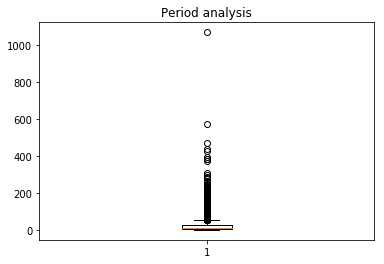

Minimum duration:  0.4279
Maximum duration:  24.42
Mean duration:  4.278103620495496


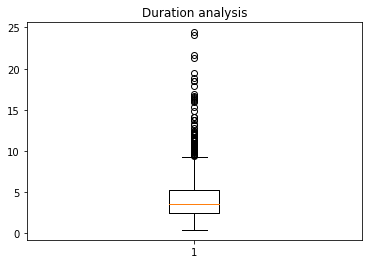

In [49]:
period_train = Y_train[:,0]

print("Minimum period: ",period_train.min())
print("Maximum period: ",period_train.max())
print("Mean period: ",period_train.mean())

plt.boxplot(period_train)
plt.title("Period analysis")
plt.show()

duration_train = Y_train[:,1]

print("Minimum duration: ",duration_train.min())
print("Maximum duration: ",duration_train.max())
print("Mean duration: ",duration_train.mean())

plt.boxplot(duration_train)
plt.title("Duration analysis")
plt.show()

In [6]:
# Choose a period grid
precision_needed = 1e-2 #ya es suficientemente pequeño 1e-3
periods = np.arange(0.01, 2000, precision_needed )

ang_freqs = 2 * np.pi / periods
freqs = 1 / periods

print("Cantidad de valores a explorar: ",ang_freqs.shape[0])
periods

Cantidad de valores a explorar:  199999


array([1.00000e-02, 2.00000e-02, 3.00000e-02, ..., 1.99997e+03,
       1.99998e+03, 1.99999e+03])

In [28]:
%%time
periodogram = lombscargle(X_time_test[i], X_lc_test[i], ang_freqs, normalize=False)#input has to be centered..
periodogram

CPU times: user 14min 36s, sys: 547 ms, total: 14min 37s
Wall time: 14min 35s


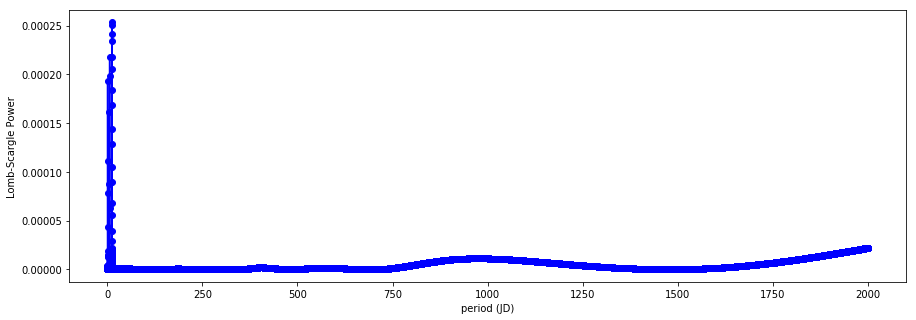

Max power Period:  12.61
Second Max power Period:  12.62


In [30]:
plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]]) ##misma escala

In [9]:
%%time
model = LombScargleGAT(fit_offset=True, center_data=False).fit(X_time_test[i], X_lc_test[i])
periodogram = model.score(periods)

CPU times: user 1min 29s, sys: 1.72 s, total: 1min 31s
Wall time: 1min 28s


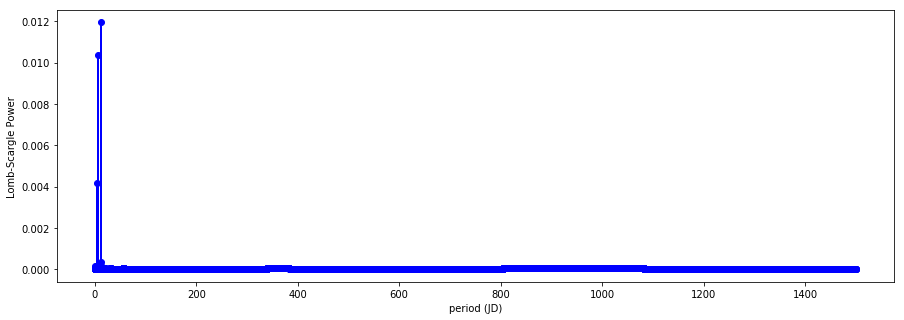

Max power Period:  12.610000000000001
Second Max power Period:  6.3100000000000005


In [10]:
plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]])

In [14]:
%%time
model = LombScargle(X_time_test[i], X_lc_test[i], center_data=False)
periodogram = model.power(freqs,method='chi2') #cython

CPU times: user 2min 22s, sys: 1.87 s, total: 2min 24s
Wall time: 2min 21s


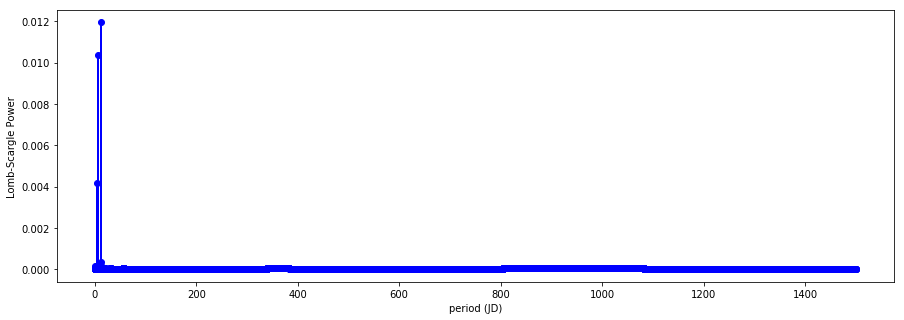

Max power Period:  12.610000000000001
Second Max power Period:  6.3100000000000005


In [12]:
plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]])

In [6]:
%%time
model = BoxLeastSquares(X_time_test[i], X_lc_test[i])
results = model.power(periods, duration=np.arange(periods.min()/5, 40, 100)) #que es duration????--duracion de transito

transit_time = results.transit_time
depth = results.depth
duration = results.duration
periodogram = results.power

CPU times: user 7min 41s, sys: 66.3 ms, total: 7min 41s
Wall time: 7min 41s


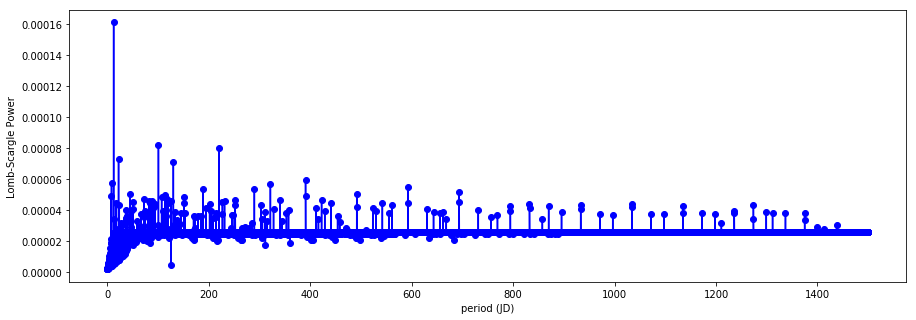

Max power Period:  12.610000000000001
Second Max power Period:  100.91000000000001


In [7]:
plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]])

In [ ]:
##selected model
total_time = time.time()
iters_time = []

Y_hat_test = []
for i in range(N):
    print("va en el :", i+1)
    iter_time = time.time()
    meta_pred = []
    
    ### PERIOD ESTIMATE --LOMB-SCARGLE Method
    periodogram = lombscargle(X_time_test[i], X_lc_test[i], ang_freqs, normalize=False) #input has to be centered..

    indx_max = periodogram.argsort()[::-1]
    period_pred = periods[indx_max[0]] 
    meta_pred.append(period_pred)
    
    Y_hat_test.append(meta_pred) ##error only on period.. for now
    iters_time.append(time.time()-iter_time)

Y_hat_test = np.asarray(Y_hat_test)

print("Time on pred (period) test set-- (mins): ",(time.time()-total_time)/60)
print("Time per data pred (period)-- (mins): ",(np.mean(iters_time))/60)

np.save("LombScar_period_p2.npy", Y_hat_test)
Y_hat_test.shape

va en el : 1
va en el : 2
va en el : 3
va en el : 4
va en el : 5
va en el : 6
va en el : 7
va en el : 8
va en el : 9
va en el : 10
va en el : 11
va en el : 12
va en el : 13
va en el : 14
va en el : 15
va en el : 16
va en el : 17
va en el : 18
va en el : 19
va en el : 20
va en el : 21
va en el : 22
va en el : 23
va en el : 24
va en el : 25
va en el : 26
va en el : 27
va en el : 28
va en el : 29
va en el : 30
va en el : 31
va en el : 32
va en el : 33
va en el : 34
va en el : 35
va en el : 36
va en el : 37
va en el : 38
va en el : 39
va en el : 40
va en el : 41
va en el : 42
va en el : 43


Tiempo para cálculo con precisión 1e-1 de periodo.
* Time on pred (period) test set-- (mins):  520.7272202650706
* Time per data pred (period)-- (mins):  1.0311385329721785

Evaluación: 

In [26]:
evaluate_metadata_raw(Y_test[:,[0]], Y_hat_test, plot=True, metadata_used=["Period"])

Period
MAE      107.668435
MApE    2060.456571
MSE    77669.451426
MeAE      13.278264
RMSLE      2.530176

{'MAE': [107.66843473456038],
 'MApE': [2060.4565710672764],
 'MSE': [77669.45142564198],
 'MeAE': [13.27826442],
 'RMSLE': [2.530175820962533]}

In [ ]:
Tiempo para cálculo con precisión 1e-2 de periodo.


Evaluación: 

In [ ]:
evaluate_metadata_raw(Y_test[:,[0]], Y_hat_test, plot=True, metadata_used=["Period"])

In [ ]:
@njit(parallel=True, cache=False, fastmath=True)
def lnlike_normal_v(o, m, e):
    m = atleast_2d(m)
    npv = m.shape[0]
    npt = o.size
    lnl = zeros(npv)
    for i in prange(npv):
        for j in range(npt):
            lnl[i] += -log(e[i]) - 0.5*log(2*pi) - 0.5*((o[j]-m[i,j])/e[i])**2
    return lnl

In [ ]:
### si lo de abajo funciona reivsar bien cómo es lo que hace (entender baseline)
#https://github.com/hpparvi/PyTransit/blob/master/notebooks/01_broadband_parameter_estimation.ipynb
    
from pytransit import QuadraticModel
from pytransit.utils.de import DiffEvol
from pytransit.orbits.orbits_py import as_from_rhop,  i_from_ba
from pytransit.param.parameter import (ParameterSet, GParameter, PParameter, LParameter,
                                       NormalPrior as NP, 
                                       UniformPrior as UP)

class LPFunction:
    def __init__(self, name: str, times: ndarray = None, fluxes: ndarray = None):
        self.tm = QuadraticModel(klims=(0.05, 0.25), nk=512, nz=512)

        # LPF name
        # --------
        self.name = name
        
        # Declare high-level objects
        # --------------------------
        self.ps = None          # Parametrisation
        self.de = None          # Differential evolution optimiser
        self.sampler = None     # MCMC sampler

        # Initialize data
        # ---------------
        self.times = asarray(times)
        self.fluxes = asarray(fluxes)
        self.tm.set_data(self.times)

        # Define the parametrisation
        # --------------------------
        self.ps = ParameterSet([
            GParameter('tc',  'zero_epoch',       'd',      NP(0.0,  0.1), (-inf, inf)),
            GParameter('pr',  'period',           'd',      NP(1.0, 1e-5), (0,    inf)),
            GParameter('rho', 'stellar_density',  'g/cm^3', UP(0.1, 25.0), (0,    inf)),
            GParameter('b',   'impact_parameter', 'R_s',    UP(0.0,  1.0), (0,      1)),
            GParameter('k2', 'area_ratio', 'A_s', UP(0.05**2, 0.25**2), (0.05**2, 0.25**2)),
            GParameter('q1', 'q1_coefficient', '', UP(0, 1), bounds=(0, 1)),
            GParameter('q2', 'q2_coefficient', '', UP(0, 1), bounds=(0, 1)),
            GParameter('loge', 'log10_error', '', UP(-4, 0), bounds=(-4, 0))])
        self.ps.freeze()

    def create_pv_population(self, npop=50):
        return self.ps.sample_from_prior(npop)
        
    def baseline(self, pv):
        """Multiplicative baseline"""
        return 1.

    def transit_model(self, pv, copy=True):
        pv = atleast_2d(pv)
        
        # Map from sampling parametrisation to the transit model parametrisation
        # ----------------------------------------------------------------------
        pvt = zeros((pv.shape[0], 7))
        pvt[:,0]   = sqrt(pv[:,4])
        pvt[:,1:3] = pv[:,0:2]
        pvt[:,  3] = as_from_rhop(pv[:,2], pv[:,1])
        pvt[:,  4] = i_from_ba(pv[:,3], pvt[:,3])
        
        # Map the limb darkening
        # ----------------------
        ldc = zeros((pv.shape[0],2))
        a, b = sqrt(pv[:,5]), 2.*pv[:,6]
        ldc[:,0] = a * b
        ldc[:,1] = a * (1. - b)
            
        return self.tm.evaluate_pv(pvt, ldc)

    def flux_model(self, pv):
        return self.transit_model(pv) * self.baseline(pv)

    def residuals(self, pv):
        return self.fluxes - self.flux_model(pv)

    def set_prior(self, pid: int, prior) -> None:
            self.ps[pid].prior = prior

    def lnprior(self, pv):
        return self.ps.lnprior(pv)

    def lnlikelihood(self, pv):
        flux_m = self.flux_model(pv)
        wn = 10**(atleast_2d(pv)[:, 7])
        return lnlike_normal_v(self.fluxes, flux_m, wn)

    def lnposterior(self, pv):
        lnp = self.lnprior(pv) + self.lnlikelihood(pv)
        return where(isfinite(lnp), lnp, -inf)

    def __call__(self, pv):
        return self.lnposterior(pv)

    def optimize(self, niter=200, npop=50, population=None, label='Global optimisation', leave=False):
        if self.de is None:
            self.de = DiffEvol(self.lnposterior, clip(self.ps.bounds, -1, 1), npop, maximize=True, vectorize=True)
            if population is None:
                self.de._population[:, :] = self.create_pv_population(npop)
            else:
                self.de._population[:,:] = population
        for _ in tqdm(self.de(niter), total=niter, desc=label, leave=leave):
            pass

    def sample(self, niter=500, thin=5, label='MCMC sampling', reset=True, leave=True):
        if self.sampler is None:
            self.sampler = EnsembleSampler(self.de.n_pop, self.de.n_par, self.lnposterior, vectorize=True)
            pop0 = self.de.population
        else:
            pop0 = self.sampler.chain[:,-1,:].copy()
        if reset:
            self.sampler.reset()
        for _ in tqdm(self.sampler.sample(pop0, iterations=niter, thin=thin), total=niter, desc=label, leave=False):
            pass

    def posterior_samples(self, burn: int=0, thin: int=1):
        fc = self.sampler.chain[:, burn::thin, :].reshape([-1, self.de.n_par])
        return pd.DataFrame(fc, columns=self.ps.names)

    def plot_mcmc_chains(self, pid: int=0, alpha: float=0.1, thin: int=1, ax=None):
        fig, ax = (None, ax) if ax is not None else subplots()
        ax.plot(self.sampler.chain[:, ::thin, pid].T, 'k', alpha=alpha)
        fig.tight_layout()
        return fig

    def plot_light_curve(self, model: str = 'de', figsize: tuple = (13, 4)):
        fig, ax = subplots(figsize=figsize, constrained_layout=True)
        cp = sb.color_palette()

        if model == 'de':
            pv = self.de.minimum_location
            err = 10**pv[7]
        elif model == 'mc':
            fc = array(self.posterior_samples())
            pv = permutation(fc)[:300]
            err = 10**median(pv[:, 7], 0)

        ax.errorbar(self.times, self.fluxes, err, fmt='.', c=cp[4], alpha=0.75)

        if model == 'de':
            ax.plot(self.times, self.flux_model(pv), c=cp[0])
        if model == 'mc':
            flux_pr = self.flux_model(fc[permutation(fc.shape[0])[:1000]])
            flux_pc = array(percentile(flux_pr, [50, 0.15,99.85, 2.5,97.5, 16,84], 0))
            [ax.fill_between(self.times, *flux_pc[i:i+2,:], alpha=0.2,facecolor=cp[0]) for i in range(1,6,2)]
            ax.plot(self.times, flux_pc[0], c=cp[0])
        setp(ax, xlim=self.times[[0,-1]], xlabel='Time', ylabel='Normalised flux')
        return fig, axs

In [ ]:
chains = []
npop, de_iter, mc_iter, mc_burn, thin = 100, 200, 1500, 1000, 10

for i in range(N):
    lpf = LPFunction(X_time_test[i], X_lc_test[i])
    lpf.optimize(de_iter, npop)
    lpf.sample(mc_burn, thin=thin)
    lpf.sample(mc_iter, thin=thin, reset=True)
    chains.append(lpf.sampler.chain.reshape([-1,lpf.sampler.chain.shape[-1]]))
chains = array(chains)


In [21]:
evaluate_metadata((Y_test[:,[0]], Y_hat_test, plot=True)

SyntaxError: invalid syntax (<ipython-input-21-a2a6bfe7a4f7>, line 1)

In [22]:
evaluate_metadata_raw(Y_test[:,[0]], Y_hat_test, plot=True, metadata_used=["Period"])


Period
MAE      107.668435
MApE    2060.456571
MSE    77669.451426
MeAE      13.278264
RMSLE      2.530176

{'MAE': [107.66843473456038],
 'MApE': [2060.4565710672764],
 'MSE': [77669.45142564198],
 'MeAE': [13.27826442],
 'RMSLE': [2.530175820962533]}